In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings(action='ignore')


In [2]:
train_data = pd.read_csv('../input/paddy-disease-classification/train.csv')
sub_data = pd.read_csv('../input/paddy-disease-classification/sample_submission.csv')

In [3]:
train_data['variety'].value_counts()

ADT45             6992
KarnatakaPonni     988
Ponni              657
AtchayaPonni       461
Zonal              399
AndraPonni         377
Onthanel           351
IR20               114
RR                  36
Surya               32
Name: variety, dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['variety'] = le.fit_transform(train_data['variety'])

In [5]:
train_data.isnull().sum()

image_id    0
label       0
variety     0
age         0
dtype: int64

In [6]:
sub_data

,image_id,label
0,200001.jpg,NaN
1,200002.jpg,NaN
2,200003.jpg,NaN
3,200004.jpg,NaN
4,200005.jpg,NaN
...,...,...
3464,203465.jpg,NaN
3465,203466.jpg,NaN
3466,203467.jpg,NaN
3467,203468.jpg,NaN


In [7]:
diseases_types=sorted(list(set(train_data['label'])))
n_classes=len(diseases_types)
print(n_classes)
print(diseases_types)

10
['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']


In [8]:
train= tf.keras.utils.image_dataset_from_directory("/kaggle/input/paddy-disease-classification/train_images/",
                                                        labels='inferred',
                                                        label_mode='categorical',
                                                        class_names=diseases_types,
                                                        color_mode='rgb',
                                                        image_size=(680,480),
                                                        shuffle=True,
                                                        validation_split=0.2,
                                                        subset='training',
                                                        seed=42)

val= tf.keras.utils.image_dataset_from_directory("/kaggle/input/paddy-disease-classification/train_images/",
                                                        labels='inferred',
                                                        label_mode='categorical',
                                                        class_names=diseases_types,   
                                                        color_mode='rgb',
                                                        image_size=(680,480),
                                                        shuffle=True,
                                                        validation_split=0.2,
                                                        subset='validation',
                                                        seed=42)

Found 10407 files belonging to 10 classes.
Using 8326 files for training.


2022-08-04 09:21:47.114002: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-04 09:21:47.263231: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-04 09:21:47.264040: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-04 09:21:47.266597: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Found 10407 files belonging to 10 classes.
Using 2081 files for validation.


In [9]:
train

<BatchDataset shapes: ((None, 680, 480, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [10]:
val

<BatchDataset shapes: ((None, 680, 480, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [11]:
from tensorflow.keras import models,layers

In [12]:
model = models.Sequential()
pretrained_model=tf.keras.applications.ResNet50(include_top=False,input_shape=(680,480,3),pooling='avg',classes=10,weights='imagenet')
    
for layer in pretrained_model.layers:
    layer.trainable=False
    
    
model.add(pretrained_model)
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(99,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

94781440/94765736 [==============================] - 0s 0us/step


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 99)                50787     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1000      
Total params: 24,688,587
Trainable params: 1,100,875
Non-trainable params: 23,587,712
_________________________________________________________________


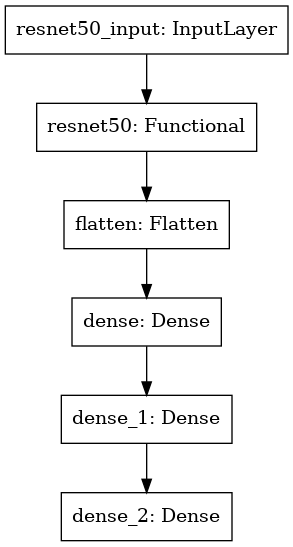

In [14]:
tf.keras.utils.plot_model(model)

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train,validation_data=val,epochs=15)

Epoch 1/15


2022-08-04 09:21:56.845352: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-08-04 09:22:00.309120: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


261/261 [==============================] - 154s 545ms/step - loss: 1.5419 - accuracy: 0.4859 - val_loss: 1.1840 - val_accuracy: 0.6170
Epoch 2/15
261/261 [==============================] - 144s 548ms/step - loss: 1.0531 - accuracy: 0.6573 - val_loss: 0.9719 - val_accuracy: 0.6848
Epoch 3/15
261/261 [==============================] - 144s 548ms/step - loss: 0.7757 - accuracy: 0.7531 - val_loss: 0.8719 - val_accuracy: 0.7160
Epoch 4/15
261/261 [==============================] - 143s 545ms/step - loss: 0.6212 - accuracy: 0.7988 - val_loss: 0.6286 - val_accuracy: 0.7929
Epoch 5/15
261/261 [==============================] - 144s 548ms/step - loss: 0.5052 - accuracy: 0.8337 - val_loss: 0.5225 - val_accuracy: 0.8309
Epoch 6/15
261/261 [==============================] - 144s 547ms/step - loss: 0.4192 - accuracy: 0.8644 - val_loss: 0.4559 - val_accuracy: 0.8530
Epoch 7/15
261/261 [==============================] - 144s 546ms/step - loss: 0.3357 - accuracy: 0.8875 - val_loss: 0.5046 - val_accura

In [16]:
test_data=tf.keras.utils.image_dataset_from_directory("/kaggle/input/paddy-disease-classification/test_images/",
                                                        labels=None,
                                                        label_mode=None,
                                                        color_mode='rgb',
                                                        image_size=(680,480),
                                                        shuffle=False)

Found 3469 files belonging to 1 classes.


In [17]:
predict=tf.argmax(model.predict(test_data),axis=-1)
predict

<tf.Tensor: shape=(3469,), dtype=int64, numpy=array([7, 8, 7, ..., 8, 1, 5])>

In [18]:
predictions=[]
for i in predict:
    predictions.append(diseases_types[i])

In [19]:
sub_data=sub_data.drop(columns='label',axis=1)
sub_data

,image_id
0,200001.jpg
1,200002.jpg
2,200003.jpg
3,200004.jpg
4,200005.jpg
...,...
3464,203465.jpg
3465,203466.jpg
3466,203467.jpg
3467,203468.jpg


In [20]:
submission=pd.DataFrame({'image_id':sub_data['image_id'],'label':predictions})
submission

,image_id,label
0,200001.jpg,hispa
1,200002.jpg,normal
2,200003.jpg,hispa
3,200004.jpg,blast
4,200005.jpg,blast
...,...,...
3464,203465.jpg,dead_heart
3465,203466.jpg,hispa
3466,203467.jpg,normal
3467,203468.jpg,bacterial_leaf_streak


In [21]:
submission.to_csv('paddy.csv',index=None)